<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/2_Zero_order_methods/2_4_Local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 2: Zero order methods

# Local Optimization Methods

In [ ]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone images
    if not Path('chapter_2_images').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/2_Zero_order_methods/chapter_2_images
    else:
        print('chapter_2_images already cloned!')

# append path for local library, data, and image import
import sys
sys.path.append('./chapter_2_images') 

# image paths
image_path_1 = 'chapter_2_images/Fig_2_6.png'
image_path_2 = 'chapter_2_images/local_method.png'
image_path_3 = 'chapter_2_images/steplength.png'

# standard imports
from IPython.display import Image, HTML

%load_ext autoreload
%autoreload 2

 As opposed to the global optimization techniques described in the previous Section - where a large number of input points are sampled simultaneously with the lowest evaluation crowned the approximate global minimum - *local optimization methods* work by taking a single sample input and refine it sequentially, driving it towards an approximate minimum point.  Local optimization methods are by far the most popular mathematical optimization schemes used in machine learning / deep learning today, with particular local optimization algorithms being the subject of the next several Chapters (as well as a number of Sections beyond this part of the text).  Nonetheless, while there is substantial variation in the kinds of specific local optimization methods we will discuss going forward, they all share a common overarching framework which we introduce in this Section.

##  The big picture 

As we saw in the previous Section global optimization methods test a multitude of simultaneously sampled input points to determine an approximate minimum of a given function $g\left(\mathbf{w}\right)$. *Local optimization methods*, on the other hand, work in the opposite manner *sequentially* refining a single sample input called an *initial point* until it reaches an approximate minimum.  


Starting with a sample input / initial point $\mathbf{w}^0$, local optimization methods refine this initialization sequentially *pulling the point* 'downhill' towards points that are lower and lower on the function ,eventually reaching an minimizer (as illustrated for a single-input function in the Figure below).   So - generally speaking - from $\mathbf{w}^0$ the point is 'pulled' downhill to a new point $\mathbf{w}^1$ lower on the function i.e., where $g\left(\mathbf{w}^0\right) > g\left(\mathbf{w}^1 \right)$.  The point $\mathbf{w}^1$ then itself 'pulled' downwards to a new point $\mathbf{w}^2$.  This process is then repeated, yielding a sequence of $K$ points (starting with our initializer) 

\begin{equation}
\mathbf{w}^0,\,\mathbf{w}^1,\,...,\mathbf{w}^K
\end{equation}

where each subsequent point is (again generally speaking) on a lower and lower portion of the function i.e.,

\begin{equation}
g\left(\mathbf{w}^0\right) > g\left(\mathbf{w}^1\right)\, > \,\cdots\,> g\left(\mathbf{w}^K\right)
\end{equation}

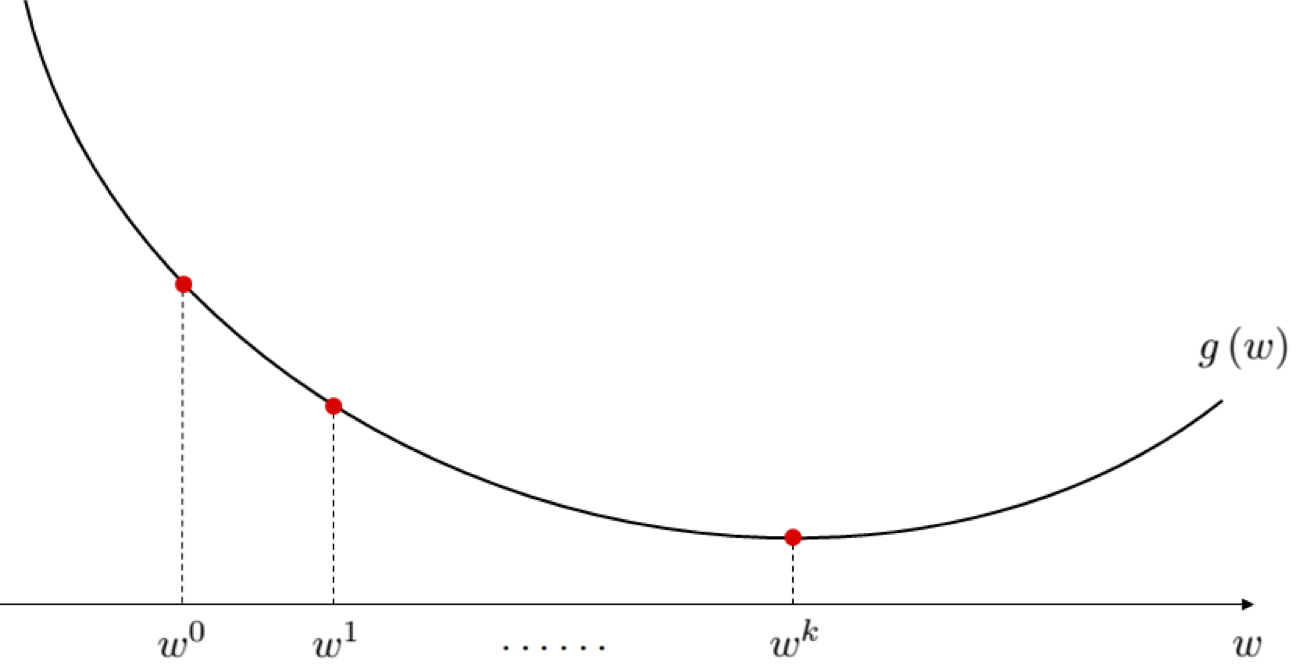

In [5]:
Image(image_path_1, width=600)

<figure>
 <figcaption>   
<strong>Figure 1:</strong> <em> Local optimization methods work by sequentially minimizing a target function in steps.  Here we illustrate a generic local optimization method which -  consisting of a sequence of steps starting with the initialization $w^0$, then moving to $w^1$, and on to $w^2$, etc., - moves towards lower points on the cost function like a ball rolling downhill.
</em>  </figcaption> 
</figure>

Unlike the global approach, a wide array of specific local optimization methods scale gracefully with input dimension because this sequential refinement process can be designed to be extremely effective (this is especially true for the first and second order local optimization methods described in the following Chapters).

## The general framework

How is the sequential refinement process enacted by a local optimization methods performed in general?  Every local method works as follows.

To take the first step from an initial point $\mathbf{w}^0$ to the very first update $\mathbf{w}^1$ (which should be lower on the function than the initializer) what is called a *descent direction* is at $\mathbf{w}^0$ is found.  This is a direction vector $\mathbf{d}^0$ in the input space that stems from $\mathbf{w}^0$ - i.e., it begins at $\mathbf{w}^0$ and points away from the initial point - that if followed leads to an input point with lower function evaluation.  When such a direction is found the first update $\mathbf{w}^1$ is then literally the sum

\begin{equation}
\mathbf{w}^1 = \mathbf{w}^0 + \mathbf{d}^0
\end{equation}

as illustrated in the Figure below.

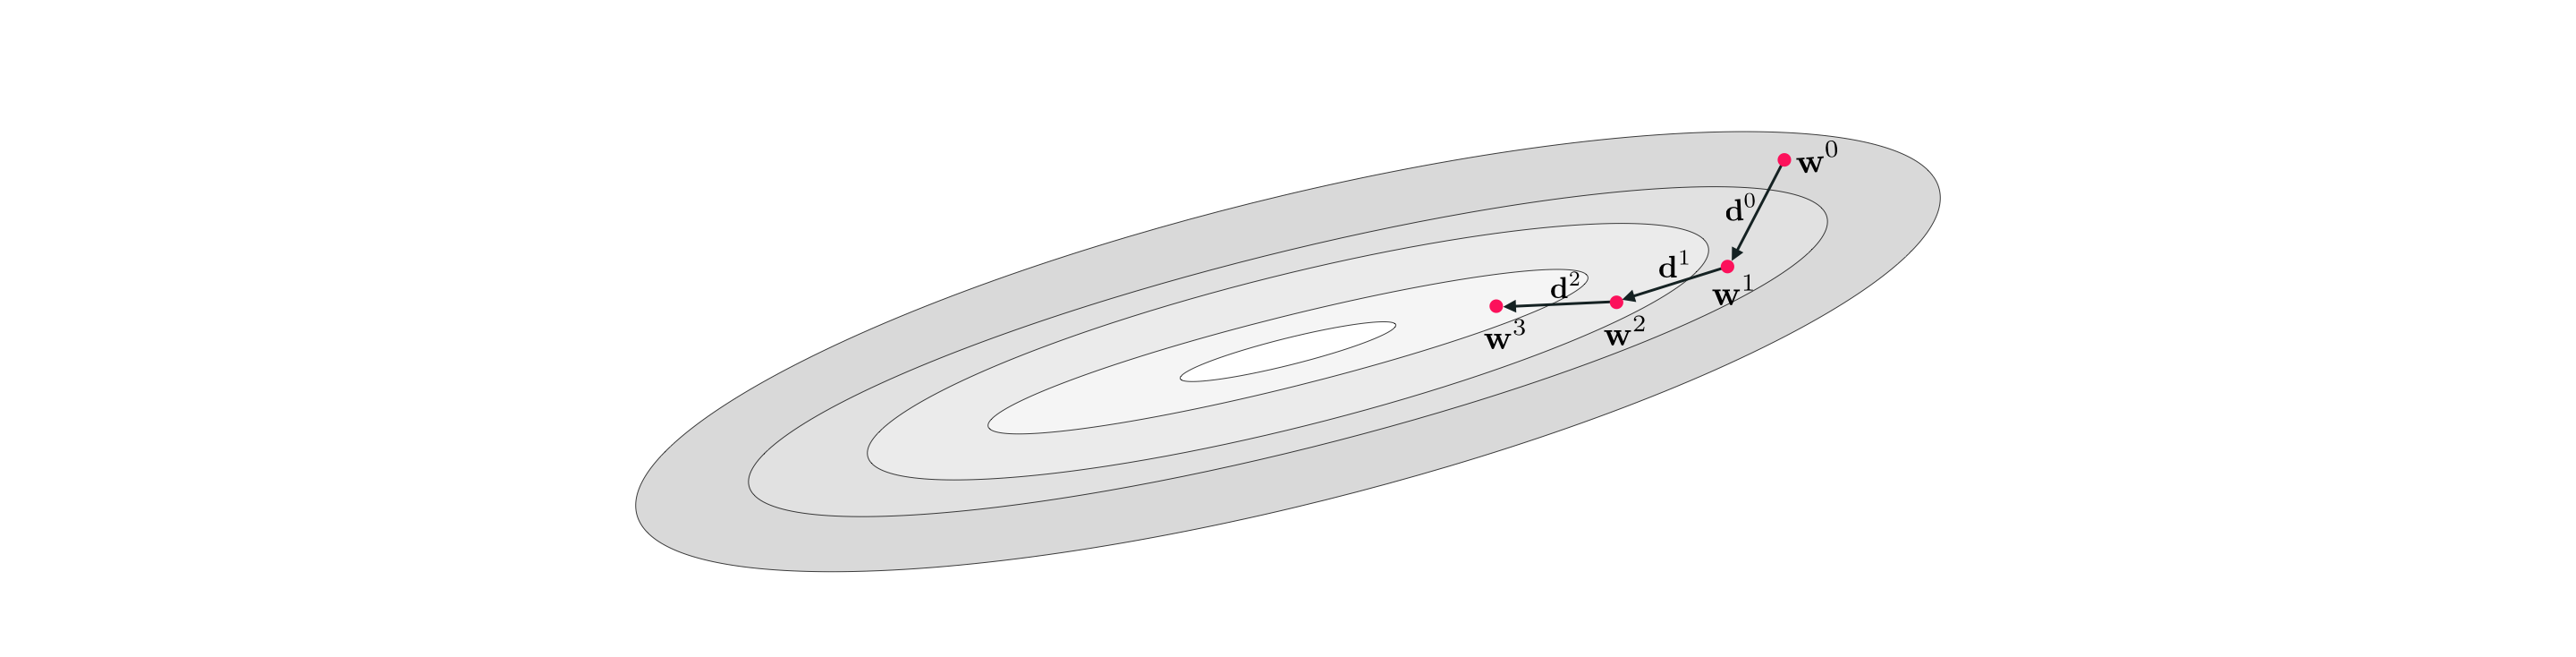

In [8]:
Image(image_path_2, width=1200)

<figure>
<figcaption>   
<strong>Figure 2:</strong> Schematic illustration of a generic local optimization scheme. <em> 
</em>  </figcaption> 
</figure>

To refine the point $\mathbf{w}^1$ we look for a new descent direction $\mathbf{d}^1$ - one that moves 'downhill' stemming from the point $\mathbf{w}^1$.  When we find such a direction the second update $\mathbf{w}^2$ is then formed as the sum

\begin{equation}
\mathbf{w}^2 = \mathbf{w}^1 + \mathbf{d}^1.
\end{equation}

And we keep going like this, determining further descent directions producing - in the end - a sequence of input points (starting with our initializer)

\begin{equation}
\begin{array}
\
\mathbf{w}^0 \\
\mathbf{w}^1 = \mathbf{w}^0 + \mathbf{d}^0  \\
\mathbf{w}^2 = \mathbf{w}^1 + \mathbf{d}^1  \\
\mathbf{w}^3 = \mathbf{w}^2 + \mathbf{d}^2  \\
\,\,\vdots \,\,\,\,\,\,\,\,\,\, \vdots \,\,\,\,\,\,\,\, \vdots\\
\mathbf{w}^K = \mathbf{w}^{K-1} + \mathbf{d}^{K-1}
\end{array}
\end{equation}

where $\mathbf{d}^{k-1}$ is the descent direction defined at the $k^{th}$ step of the process

\begin{equation}
\mathbf{w}^{k} = \mathbf{w}^{k-1} + \mathbf{d}^{k-1} 
\end{equation}

and $g(\mathbf{w}^0) > g(\mathbf{w}^1) > g(\mathbf{w}^2) > \cdots > g(\mathbf{w}^{K}) $.  

How are these *descent directions* stemming - stemming from each subsequent update - actually found?  There are a multitude of ways of determining proper descent directions - indeed in the remaining Sections of this Chapter we discuss *zero-order* approaches for doing this, and in the following Chapters we describe *first* and *second* order approaches (i.e., approaches that leverage the first and/or second derivative of a function to determine descent directions).  So - in other words - it is precisely this - how the descent directions are determined - which distinguishes local optimization schemes from one another.

## The steplength parameter

Looking closely in equation (6) we can calculate precisely how far we travel at the $k^{th}$ step of a generic local optimization scheme.  Measuring the distance traveled from the previous $\left(k-1\right)^{th}$ point we can see that we move a distance precisely equal to the length of the $\left(k-1\right)^{th}$ descent direction as

\begin{equation}
\left \Vert\mathbf{w}^{k} - \mathbf{w}^{k-1}  \right\Vert_2 = \left \Vert\ \left(\mathbf{w}^{k-1} + \mathbf{d}^{k-1}\right) - \mathbf{w}^{k-1}  \right\Vert_2 =  \left \Vert  \mathbf{d}^{k-1} \right \Vert_2.
\end{equation}

Depending on how our descent directions are generated - as we will see - we may or may not have control over their length (all we ask is that they point in the right direction, 'down hill').  This can mean even if they point in the right direction - towards input points that are lower on the function - that their *length* could be problematic.  If e.g., they are too long then a local method can oscillate wildly at each update step never reaching an approximate minimum, or likewise if they are too short *in length* a local method we move so sluggishly slow that far too many steps would be required to reach an approximate minimum.  Both of these potentialities are illustrated in the Figure below.

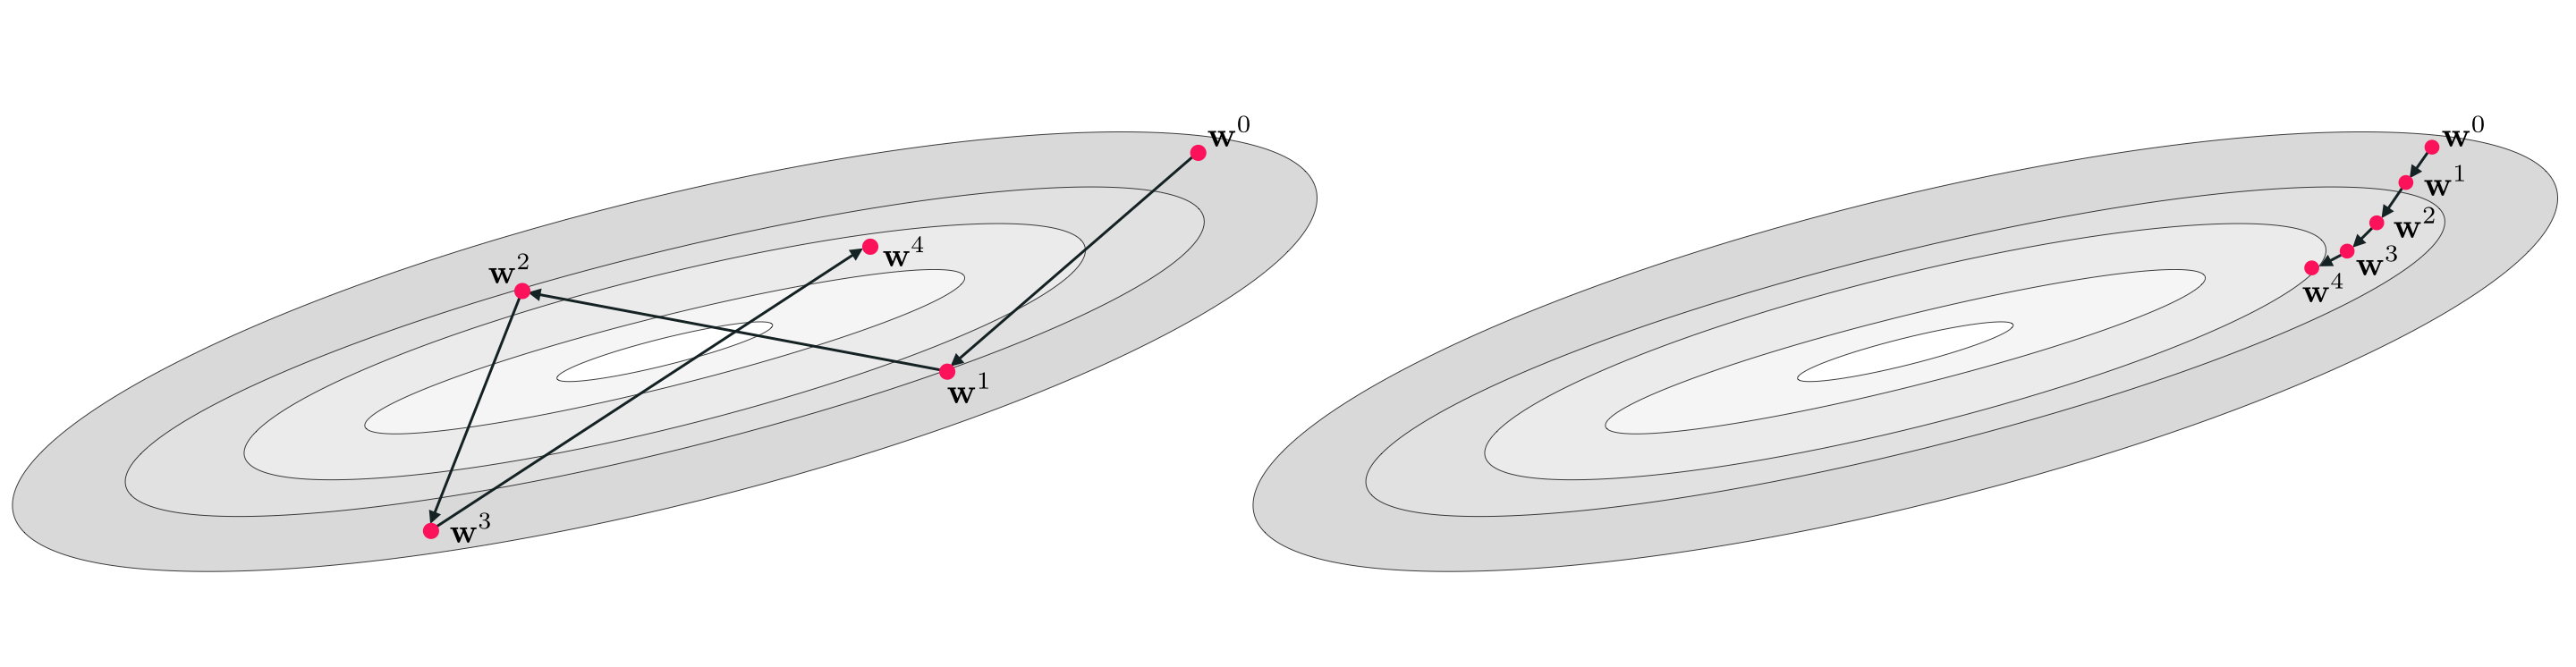

In [10]:
Image(image_path_3, width=1200)

<figure>
<figcaption>   
<strong>Figure 3:</strong> (left) Direction vectors are too large causing a wild oscillatory behavior around the minimum. (right) Direction vectors are too small, requiring a large number of steps be taken to reach the minimum. <em> 
</em>  </figcaption> 
</figure>

Because of this potential problem many local optimization schemes come equipped with what is called a *steplength parameter* (or a *learning rate* parameter in the jargon of machine learning / deep learning) that we as humans can control, and helps us control the length of each update step (hence the name *steplength parameter*).  This is simply a parameter - typically denoted by the Greek letter $\alpha$ - that is added to the generic local optimization update scheme described above and allows us to control the length of each update step.  With a steplength parameter the generic $k^{th}$ update step in equation (6) is written analogously as 

\begin{equation}
\mathbf{w}^{k} = \mathbf{w}^{k-1} + \alpha \mathbf{d}^{k-1}.
\end{equation}

The entire sequence of $K$ steps then similarly is written as 

\begin{equation}
\begin{array}
\
\mathbf{w}^0 \\
\mathbf{w}^1 = \mathbf{w}^0 + \alpha \mathbf{d}^0  \\
\mathbf{w}^2 = \mathbf{w}^1 + \alpha \mathbf{d}^1  \\
\mathbf{w}^3 = \mathbf{w}^2 + \alpha \mathbf{d}^2  \\
\,\,\vdots \,\,\,\,\,\,\,\,\,\, \vdots \,\,\,\,\,\,\,\, \vdots\\
\mathbf{w}^K = \mathbf{w}^{K-1} + \alpha \mathbf{d}^{K-1}
\end{array}
\end{equation}

In any case, the only difference between this form for the $k^{th}$ step and the original is that now we scale the descent direction $\mathbf{d}^{k-1}$ by the parameter $\alpha$ - which we can set as we please.  Re-calculating the distance traveled by the $k^{th}$ step with this added parameter we can see that

\begin{equation}
\left \Vert\mathbf{w}^{k} - \mathbf{w}^{k-1}  \right\Vert_2 = \left \Vert\ \left(\mathbf{w}^{k-1} + \alpha \mathbf{d}^{k-1}\right) - \mathbf{w}^{k-1}  \right\Vert_2 = \alpha  \left \Vert  \mathbf{d}^{k-1} \right \Vert_2.
\end{equation}

In other words the length of the $k^{th}$ step is now proportional to the descent direction, and we can fine tune precisely how far we wish to travel in its direction by setting $\alpha$ as we please.  A common choice is to set $\alpha$ to some fixed small constant value for each of the $K$ steps - but like local optimization methods themselves there are a number of ways of usefully setting the steplength parameter which we will discuss in the future.